1 Загрузите файл HR.csv в pandas dataframe **5 баллов**   
2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение). **10 баллов**  
3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. **10 баллов**  
4 Рассчитайте сколько сотрудников работает в каждом департаменте. **5 баллов**  
5 Показать распределение сотрудников по зарплатам. **5 баллов**  
6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности **5 баллов**  
7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом **10 баллов**  
8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): **10 баллов**
 - Доля сотрудников с повышением за последние 5 лет  
 - Средняя степень удовлетворенности  
 - Среднее количество проектов  
 
9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки **20 баллов**  
10 Загрузить jupyter notebook с решение на github и прислать ссылку **5 баллов**

Итого - максимум 85 баллов  
Для зачета необходимо набрать минимум 55

Признаки:  
1.**satisfaction_level**​ - Уровень удовлетворенности работой  
2.**Last_evaluation** ​- Время с момента последней оценки в годах  
3.**number_projects**​ - Количество проектов, выполненных за время работы  
4.**average_monthly_hours**​ - Среднее количество часов на рабочем месте в месяц  
5.**time_spend_company**​ - Стаж работы в компании в годах  
6.**work_accident**​ - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7.**left**​ - уволился ли сотрудник  
8.**promotion_last_5years**​ - повышался ли сотрудник за последние пять лет  
9.**department** ​- отдел в котором работает сотрудник  
10.**salary**​ - относительный уровень зарплаты  


In [1]:
#1 Загрузите файл HR.csv в pandas dataframe 5 баллов
import pandas as pd

In [205]:
hr = pd.read_csv('HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [37]:
#2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение). 10 баллов
describe = hr.describe()
for column_name in describe.columns:
    describe.loc['Мода', column_name] = hr[column_name].mode()[0]
describe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
Мода,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


In [39]:
#3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 
#Определите две самые скоррелированные и две наименее скоррелированные переменные. 10 баллов
corr_matrix = hr.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [43]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})

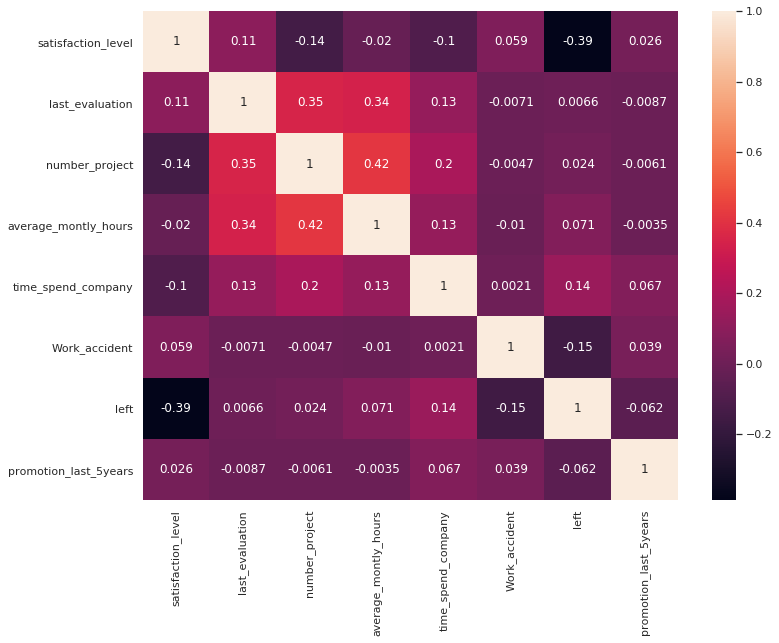

In [44]:
sns.heatmap(corr_matrix, annot=True)

Две самые скоррелированные переменные: average_monthly_hours и number_projects, что показывает зависимость между отработанным временем и выполненными проектами
Также, большая зависимость у left и satisfaction_level

Наименее скоррелированные переменные: Work_accident и time_spend_company

In [64]:
#4 Рассчитайте сколько сотрудников работает в каждом департаменте. 5 баллов
hr['department'].value_counts().reset_index()

,index,department
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [94]:
#5 Показать распределение сотрудников по зарплатам.
hr['salary'].value_counts().reset_index().style.bar(align='mid')

,index,salary
0,low,7316
1,medium,6446
2,high,1237


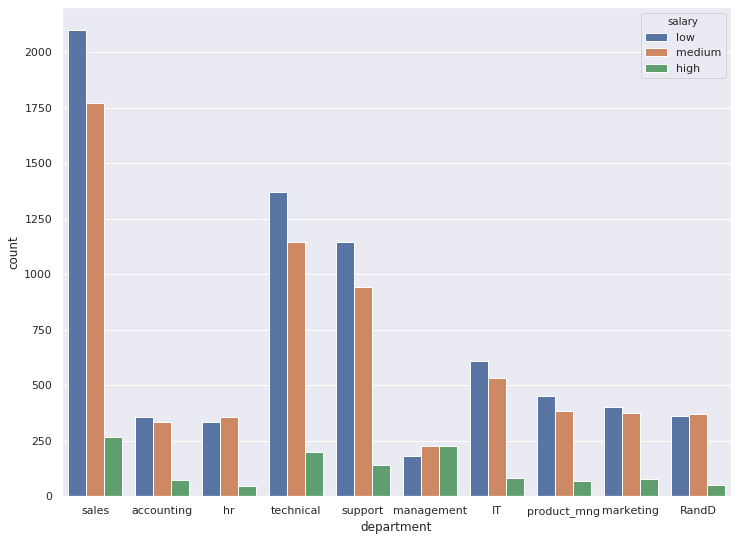

In [135]:
#6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности 5 баллов
sns.countplot(x = 'department', hue = 'salary', data = hr)

In [136]:
#7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, 
#чем сотрудники с низким окладом 10 баллов

H0: сотрудники с высоким окладом проводят на работе столько же времени, сколько сотрудники с низким окладом  
H1: сотрудники с высоким окладом проводят на работе меньше или больше времени, чем сотрудники с низким окладом 

За alpha будем принимать 0.05

In [140]:
alpha = 0.05

In [139]:
low_salary = hr.loc[hr['salary'] == 'low']
high_salary = hr.loc[hr['salary'] == 'high']

In [143]:
from scipy import stats as st

In [148]:
result = st.ttest_ind(low_salary['average_montly_hours'], high_salary['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, они работают разное время')
    if result.statistic > 0:
        print('Люди с низким окладом работают больше')
    else:
        print('Люди с вясоким окладом работают больше')
else:
    print('Не отвергаем нулевую гипотезу, они работают примерно одинаково по времени')

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу, они работают примерно одинаково по времени


In [146]:
#8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): 10 баллов

#   Доля сотрудников с повышением за последние 5 лет
#   Средняя степень удовлетворенности
#   Среднее количество проектов

In [186]:
left_workers = hr.loc[hr['left'] == 1]
left_workers_promoted = left_workers.loc[left_workers['promotion_last_5years'] == 1].count()[0]
print('Среди уволившихся сотрудников')
print(f'Доля сотрудников с повышением за последние 5 лет: {left_workers_promoted/left_workers.count()[0]*100}%')
print(f'Средняя степень удовлетворенности: {left_workers["satisfaction_level"].mean()}')
print(f'Среднее количество проектов: {left_workers["number_project"].mean()}')
print(f'---------------------------------')

stayed_workers = hr.loc[hr['left'] == 0]
stayed_workers_promoted = stayed_workers.loc[stayed_workers['promotion_last_5years'] == 1].count()[0]
print('Среди неуволившихся сотрудников')
print(f'Доля сотрудников с повышением за последние 5 лет: {stayed_workers_promoted/stayed_workers.count()[0]*100}%')
print(f'Средняя степень удовлетворенности: {stayed_workers["satisfaction_level"].mean()}')
print(f'Среднее количество проектов: {stayed_workers["number_project"].mean()}')
print(f'---------------------------------')

Среди уволившихся сотрудников
Доля сотрудников с повышением за последние 5 лет: 0.5320638476617194%
Средняя степень удовлетворенности: 0.44009801176140917
Среднее количество проектов: 3.8555026603192384
---------------------------------
Среди неуволившихся сотрудников
Доля сотрудников с повышением за последние 5 лет: 2.6251312565628284%
Средняя степень удовлетворенности: 0.666809590479516
Среднее количество проектов: 3.786664333216661
---------------------------------


In [206]:
# 9 Разделить данные на тестовую и обучающую выборки. 
# Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). 
# Оценить качество модели на тестовой выборки 20 баллов
from sklearn.model_selection import train_test_split

In [227]:
hr_train, hr_test = train_test_split(hr, test_size=0.3)

In [228]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [229]:
del hr_train['department']
del hr_test['department']
del hr_train['salary']
del hr_test['salary']

In [230]:
y_train, y_test = hr_train['left'], hr_test['left']
lda = LinearDiscriminantAnalysis()
lda.fit(hr_train, y_train)
lda.predict(hr_test)

array([0, 0, 0, ..., 0, 1, 0])

In [231]:
result = pd.DataFrame([y_test.values, lda.predict(hr_test)]).T
result

,0,1
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
4495,0,0
4496,0,0
4497,0,0
4498,1,1


In [232]:
from sklearn.metrics import accuracy_score

In [236]:
print(f'Точность модели: {accuracy_score(y_test, lda.predict(hr_test))}%')

Точность модели: 0.7635555555555555%
